In [103]:
#ch!pip install kaggle


In [104]:
"""from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip#loading the data set
"""

'from google.colab import files\nfiles.upload()\n\n!mkdir -p ~/.kaggle\n!mv kaggle.json ~/.kaggle\n\n!chmod 600 ~/.kaggle/kaggle.json\n!kaggle competitions download -c digit-recognizer\n!unzip digit-recognizer.zip#loading the data set\n'

In [105]:
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
# Load and preprocess the data
train_df = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [106]:
train_df.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [107]:
xtrain=train_df.drop("label",axis=1).values.astype("float32")/255.0#float32 is used to convert the
#pixel values to 32-bit floating-point numbers.
#/255.0 is used to convert pixcel into 0 -1 format
ytrain=train_df["label"].values

In [108]:
print(xtrain)
print("ytrain",ytrain)

# Extract the unique digit labels
unique_digits = train_df["label"].unique()

# Print the unique digit labels
print("Digit including:", unique_digits)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
ytrain [1 0 1 ... 7 6 9]
Digit including: [1 0 4 7 3 5 8 9 2 6]


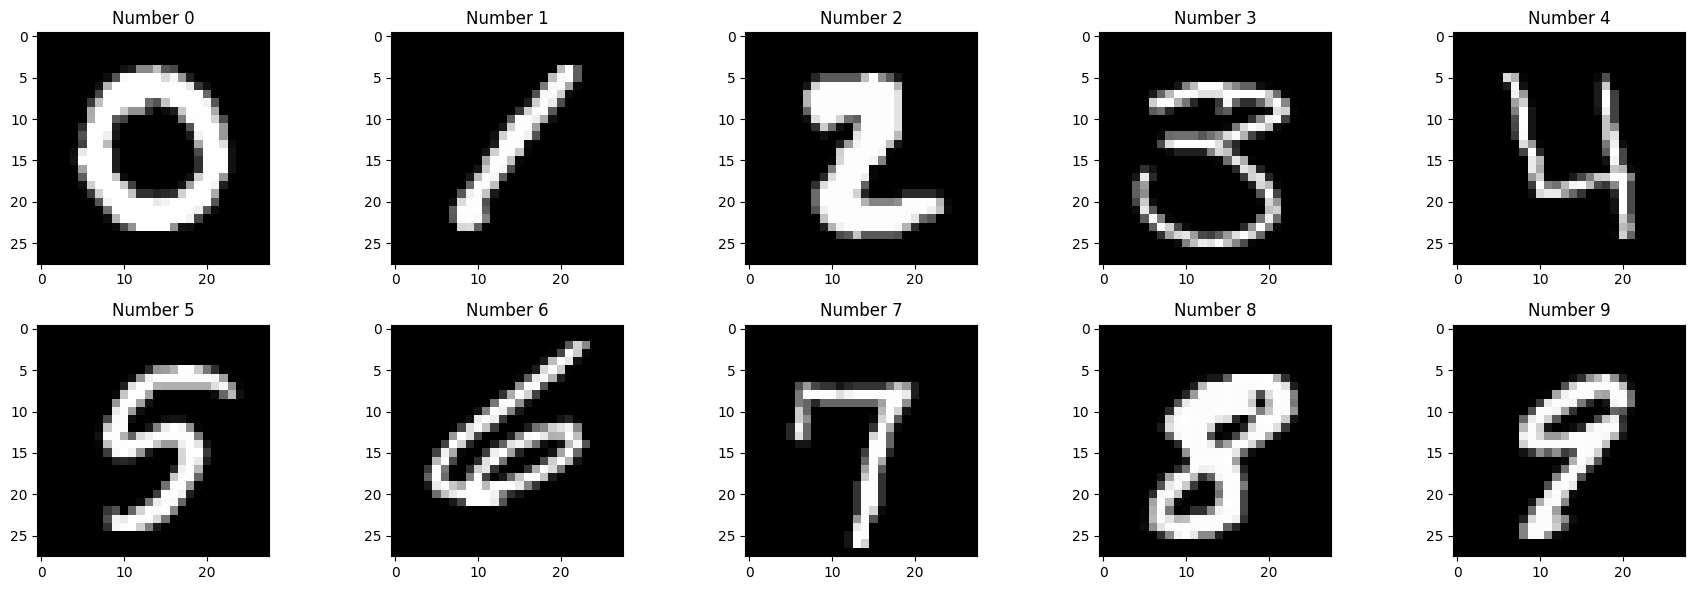

In [109]:
unique_digits =np.arange(10)
# Set the figure size for the subplots
plt.figure(figsize=(18, 6))

# Iterate through each digit and display one example
for i, digit in enumerate(unique_digits):
    # Filter the dataset to get images of the current digit
    digit_data = train_df[train_df["label"] == digit]

    # Choose an image from the filtered data to display (e.g., the first one)
    image_to_display = digit_data.iloc[0, 1:].values.astype("float32")
    image_to_display = image_to_display.reshape(28, 28)

    # Create a subplot for the current digit
    plt.subplot(2,5, i + 1)#2-rows and 5 columns
    plt.imshow(image_to_display, cmap="gray")
    plt.title(f"Number {digit}")


# Adjust subplot spacing
plt.tight_layout()

# Show all the digit images
plt.show()

In [120]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 5408)              0         
                                                                 
 dense_65 (Dense)            (None, 128)               692352    
                                                                 
 dense_66 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [124]:
model.fit(xtrain.reshape(-1, 28, 28, 1), ytrain, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.1064 - accuracy: 0.9693
Epoch 2/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0330 - accuracy: 0.9896
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 5/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0164 - accuracy: 0.9950
Epoch 6/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0122 - accuracy: 0.9955
Epoch 7/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 8/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 9/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 10/10
1313/1313 [==============================] - 28s 21m

In [127]:

# Load the actual test data (in this case, we are using the same training data for demonstration)
X_test = xtrain
y_test = ytrain

# Define the range of images to process
start_index = 0  # Replace with the start index of the range
end_index = 50  # Replace with the end index of the range

# Loop through the specified range of images and make predictions
for i in range(start_index, end_index):
    test_image = X_test[i].reshape(1, 28, 28, 1)
    predicted_label = model.predict(test_image)
    predicted_digit = np.argmax(predicted_label)

    # Print both the actual and predicted values
    actual_digit = y_test[i]
    print(f"Image {i+1}: Actual Digit:- {actual_digit}, Predicted Digit:- {predicted_digit}")


1/1 [==============================] - 0s 39ms/step
Image 1: Actual Digit:- 1, Predicted Digit:- 1
1/1 [==============================] - 0s 58ms/step
Image 2: Actual Digit:- 0, Predicted Digit:- 0
1/1 [==============================] - 0s 49ms/step
Image 3: Actual Digit:- 1, Predicted Digit:- 1
1/1 [==============================] - 0s 38ms/step
Image 4: Actual Digit:- 4, Predicted Digit:- 4
1/1 [==============================] - 0s 47ms/step
Image 5: Actual Digit:- 0, Predicted Digit:- 0
1/1 [==============================] - 0s 37ms/step
Image 6: Actual Digit:- 0, Predicted Digit:- 0
1/1 [==============================] - 0s 37ms/step
Image 7: Actual Digit:- 7, Predicted Digit:- 7
1/1 [==============================] - 0s 49ms/step
Image 8: Actual Digit:- 3, Predicted Digit:- 3
1/1 [==============================] - 0s 51ms/step
Image 9: Actual Digit:- 5, Predicted Digit:- 5
1/1 [==============================] - 0s 36ms/step
Image 10: Actual Digit:- 3, Predicted Digit:- 3
1/1 [====

In [129]:
'''
# Build a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (you can adjust the number of epochs and other hyperparameters)
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=4)
model = keras.Sequential([ ... ]): This line creates a sequential model, which is a linear stack of layers.
 In a sequential model, you can add layers one after the other, and data flows through the layers sequentially.

keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):


keras.layers.Conv2D: This line adds a 2D convolutional layer to the model. Convolutional layers are typically used in image processing tasks for feature extraction.
32: This parameter specifies the number of filters (also known as kernels) in the convolutional layer. Each filter learns to recognize different features in the input.
(3, 3): This parameter specifies the size of the convolutional kernel. In this case, it's a 3x3 kernel.
activation='relu': The activation function used in this layer is Rectified Linear Unit (ReLU), which is a common choice for convolutional layers.
It introduces non-linearity into the model.
input_shape=(28, 28, 1): This parameter specifies the shape of the input data that will be fed into the model.
In this case, the input shape is 28x28 pixels with a single color channel (grayscale).
keras.layers.MaxPooling2D((2, 2)):

keras.layers.MaxPooling2D: This line adds a max-pooling layer to the model.
 Max-pooling is a downsampling operation that reduces the spatial dimensions of the previous layer's output while retaining important features.
(2, 2): This parameter specifies the size of the pooling window, which is 2x2 in this case.
keras.layers.Flatten(): This line adds a flattening layer to the model. The purpose of this layer is to convert the multi-dimensional output from
the previous layers into a one-dimensional vector. This is typically done before connecting to fully connected (dense) layers.

keras.layers.Dense(128, activation='relu'):

keras.layers.Dense: This line adds a fully connected (dense) layer to the model. Dense layers are used for classification and regression tasks.
128: This parameter specifies the number of neurons (units) in this dense layer.
activation='relu': The activation function used in this dense layer is ReLU.
keras.layers.Dense(10, activation='softmax'):

Another fully connected dense layer is added with 10 neurons, corresponding to the 10 possible digit classes (0 to 9).
activation='softmax': The softmax activation function is used in this layer. It converts the model's output into probability values,
 where each value represents the probability of the input image belonging to a specific digit class'''

"\n# Build a CNN model\nmodel = keras.Sequential([\n    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),\n    keras.layers.MaxPooling2D((2, 2)),\n    keras.layers.Flatten(),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(10, activation='softmax')\n])\n\n# Compile the model\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\n# Train the model (you can adjust the number of epochs and other hyperparameters)\nmodel.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=4)\nmodel = keras.Sequential([ ... ]): This line creates a sequential model, which is a linear stack of layers.\n In a sequential model, you can add layers one after the other, and data flows through the layers sequentially.\n\nkeras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):\n\n\nkeras.layers.Conv2D: This line adds a 2D convolutional layer to the model. Convolutional laye